<a href="https://colab.research.google.com/github/rohini-rs1/TSF1/blob/master/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 5 To explore Business Analytics Perform 'Exploratory Data Analysis' on the Provided dataset samplesuperstore.




You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? You can choose any of the tool of your choice

## Importing library and Reading Dataset

In [3]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


In [6]:
import io
data = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

In [8]:
# Import the `pandas` library as `pd`
import pandas as pd
import numpy as np


# Print out `data`
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Displaying first 3 rows & checking shape of the data¶


In [9]:
# Inspecting the first 3 rows
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [10]:
data.shape

(9994, 13)

## Checking and Correcting Datatypes


In [11]:
data.info()  #gives information of all variables(columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
#correcting the datatypes
data['Postal Code'] = data['Postal Code'].astype('object')
data['Quantity'] = data['Quantity'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   float64
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(4), object(9)
memory usage: 1015.1+ KB


## To check and delete invalid values

In [14]:
data.isnull() #to check if not we have any invalids values in the dataset.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.dropna(inplace=True)  #to remove the invalid records within our dataset.

## Checking overall Sales & Profit of the company

In [16]:
#Checking Total Sales & Profit of the company
Sales=sum(data["Sales"])
Profit=sum(data["Profit"])

print("Overall Sales of the company is ", Sales, "dollors")
print("Overall Profits of the company is ", Profit, "dollors")

Overall Sales of the company is  2297200.860299955 dollors
Overall Profits of the company is  286397.0217000013 dollors


#### Overall Sales of the company is 2297200.860299955 dollors.

#### Overall Profits of the company is 286397.02170000126 dollors.

### Creating new variables(columns) in the data!

In [17]:
data['Revenue'] = data['Sales'] - data['Profit']   # creating Revenue Column
data['GrossPrice'] = (data['Revenue'] - data['Profit']) / data['Quantity']  #creating gross price column
data['NetPrice'] = data['GrossPrice'] - (data['GrossPrice'] * data['Discount'])  #creating netprice column
data = data.drop(columns=['GrossPrice']) #deleting grossprice column , since it was only use to create netprice column
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Revenue,NetPrice
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2.0,0.0,41.9136,220.0464,89.0664
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3.0,0.0,219.5820,512.3580,97.5920
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2.0,0.0,6.8714,7.7486,0.4386


### Data visualization

In [18]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Categorical data

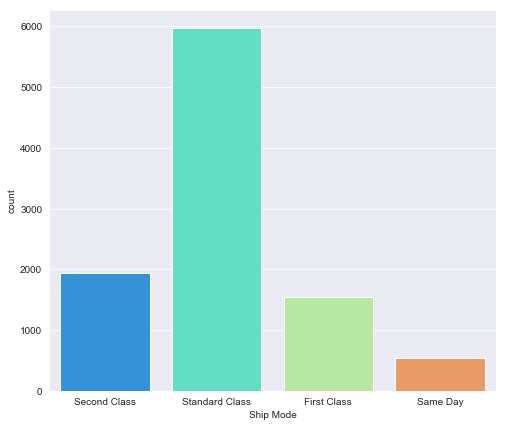

In [ ]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x="Ship Mode",data=data, palette='rainbow')

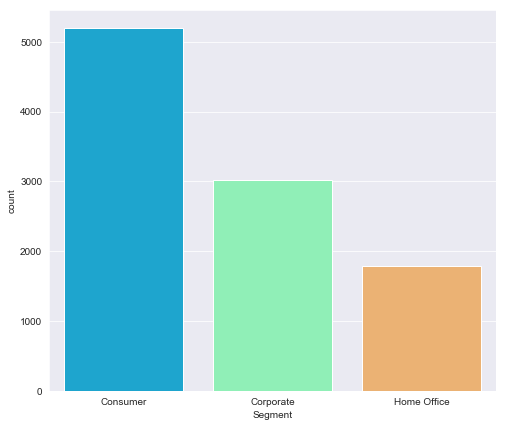

In [ ]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x='Segment',data=data, palette='rainbow')

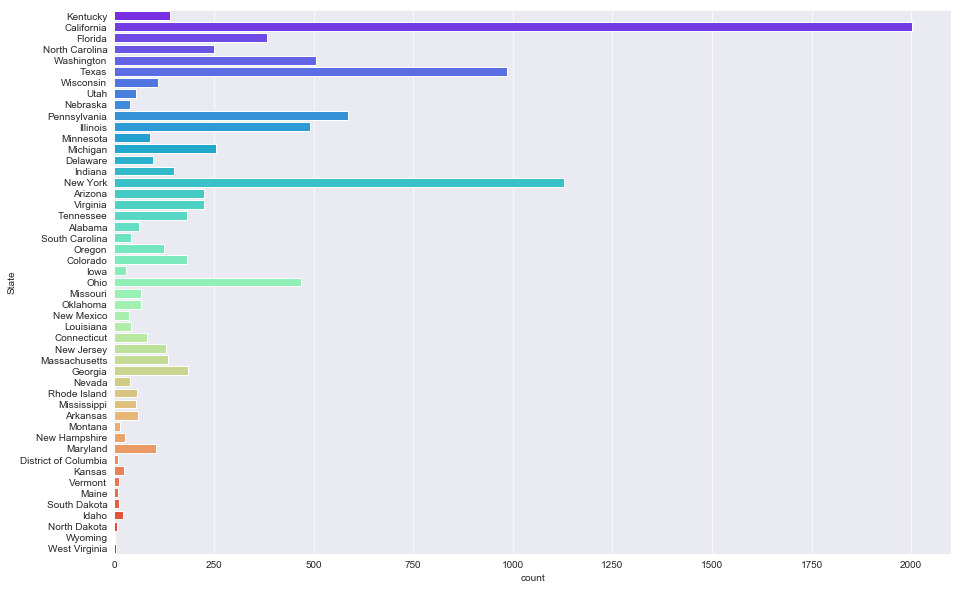

In [ ]:
plt.figure(figsize=(15,10)); sns.set_style('darkgrid');
sns.countplot(y='State',data=data, palette='rainbow')

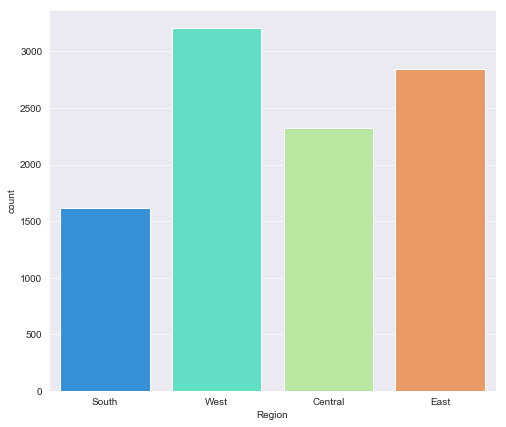

In [ ]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x='Region',data=data, palette='rainbow')

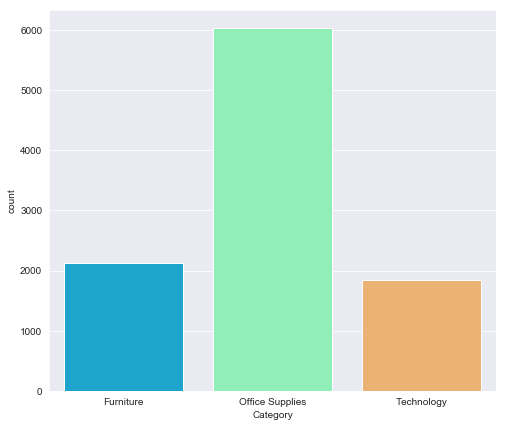

In [ ]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x='Category',data=data, palette='rainbow')

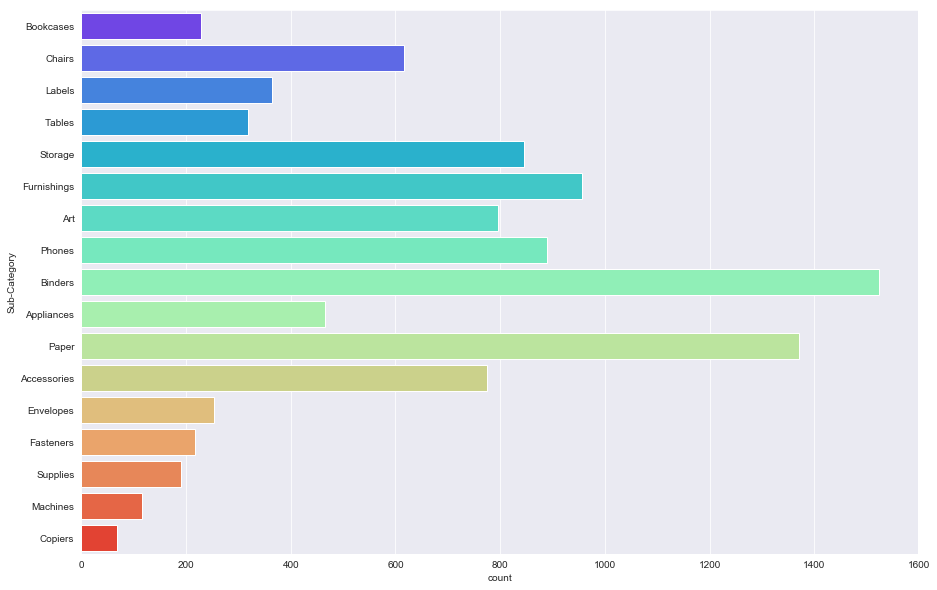

In [ ]:
plt.figure(figsize=(15,10));sns.set_style('darkgrid')
sns.countplot(y='Sub-Category',data=data, palette='rainbow')

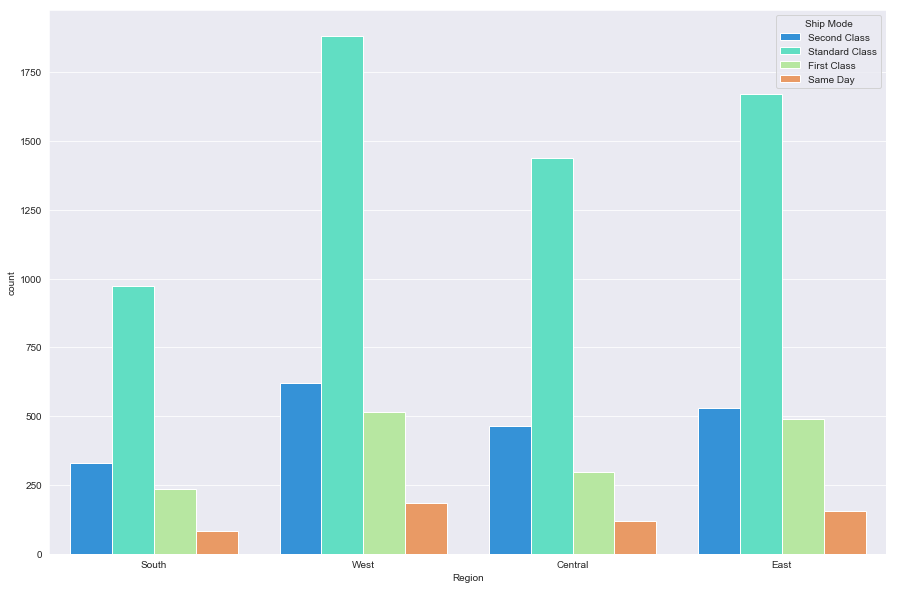

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.countplot(x='Region',hue="Ship Mode",data=data, palette='rainbow')

<Figure size 1440x720 with 0 Axes>

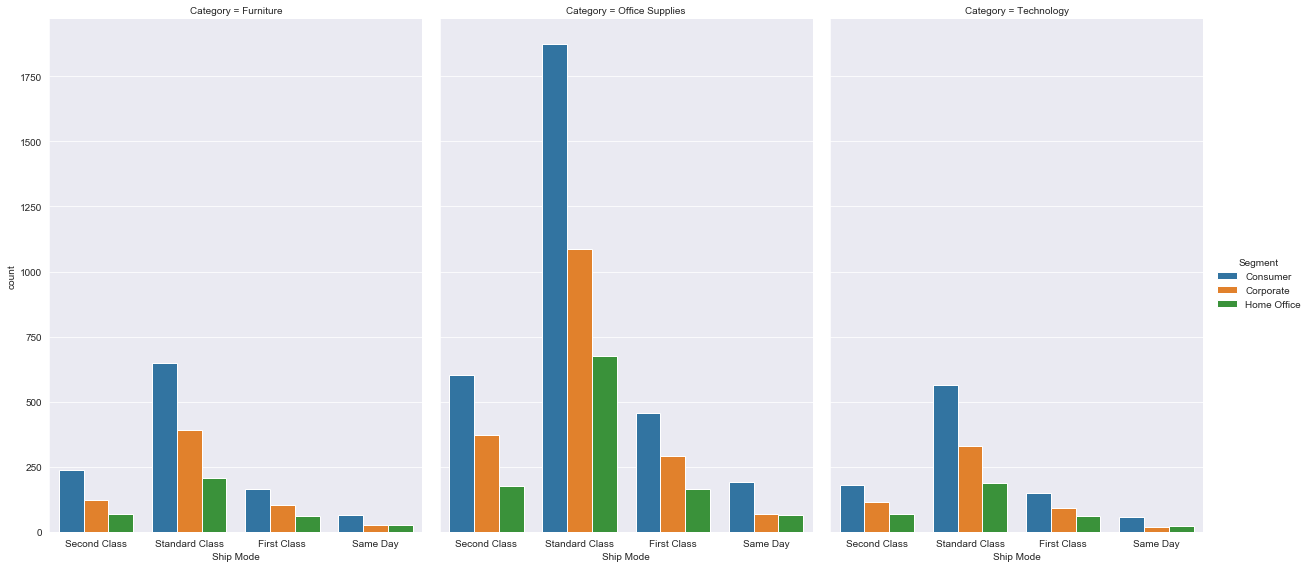

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x="Ship Mode", hue="Segment", col="Category",
                data=data, kind="count",
                height=8, aspect=.7);

#### we can see that for any category, Standard class shiping mode is highest with consumer segment

<Figure size 1440x720 with 0 Axes>

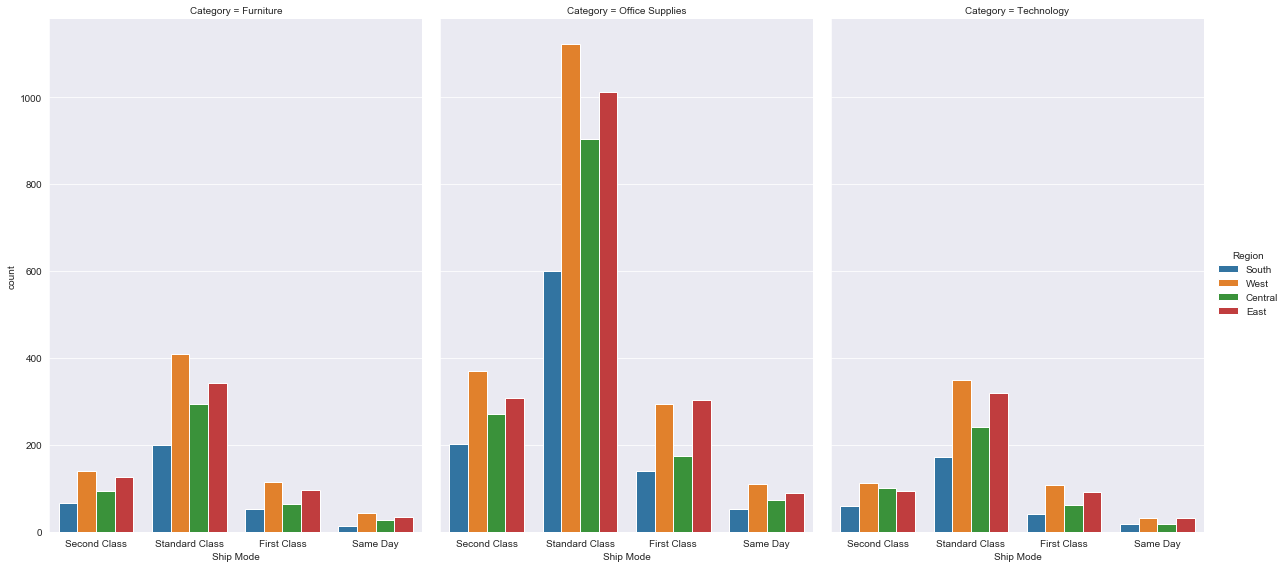

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x="Ship Mode", hue="Region", col="Category",
                data=data, kind="count",
                height=8, aspect=.7);

#### we can see that for any category, Standard class shiping mode is highest with western region

#### Continuous variables

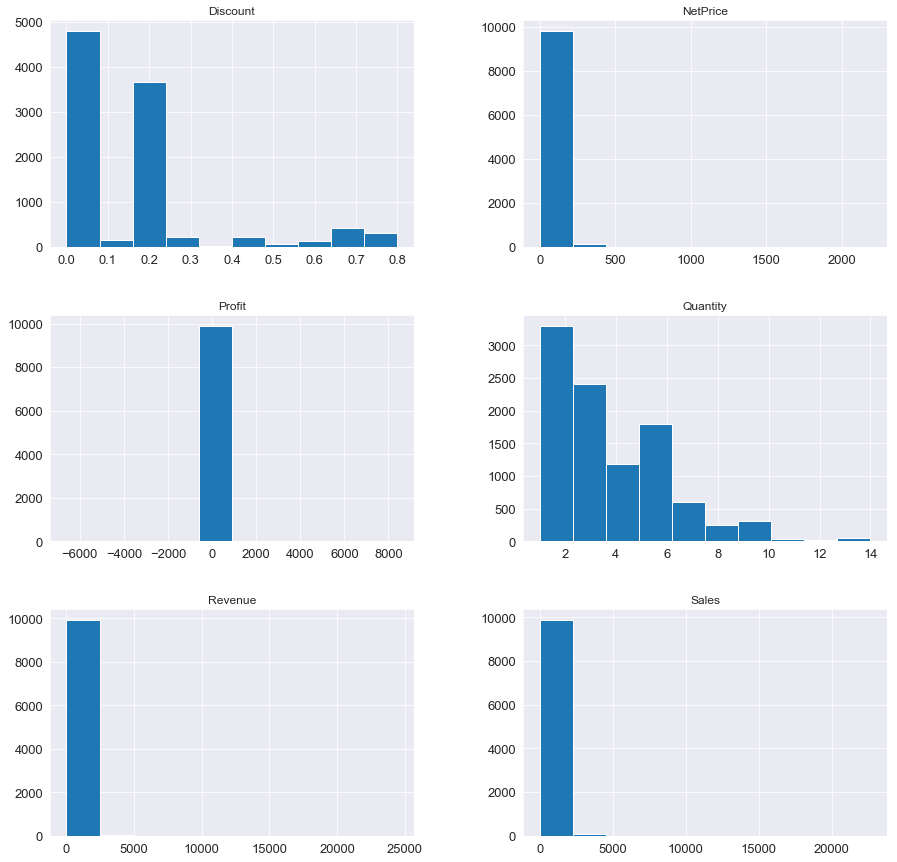

In [ ]:
df_Continuous = data.select_dtypes(include = ['float64', 'int64']) 
#To make histograms of continuous variables to see their data distributions
sns.set_style('darkgrid')
df_Continuous.hist(figsize=(15,15),xlabelsize=13, ylabelsize=13);

#### Continuous vs category variables insights

C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


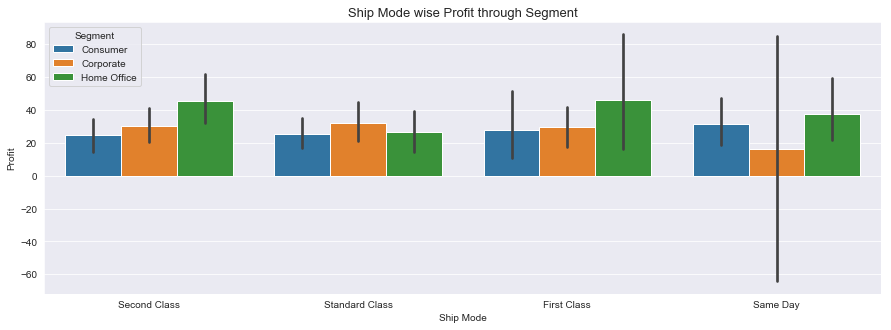

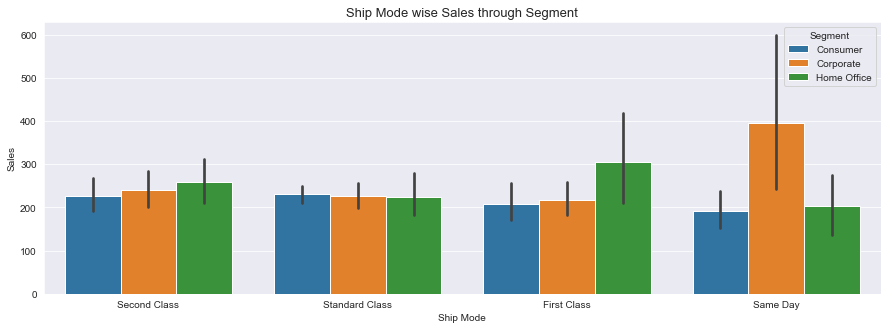

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Profit", hue="Segment", data=data);plt.title('Ship Mode wise Profit through Segment',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Sales", hue="Segment", data=data);plt.title('Ship Mode wise Sales through Segment',fontsize = 13)
plt.show()

#### Profit are lowest on same day shipping mode for corporate segment.

#### Sales are highest on same day shipping mode for corporate segment

C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


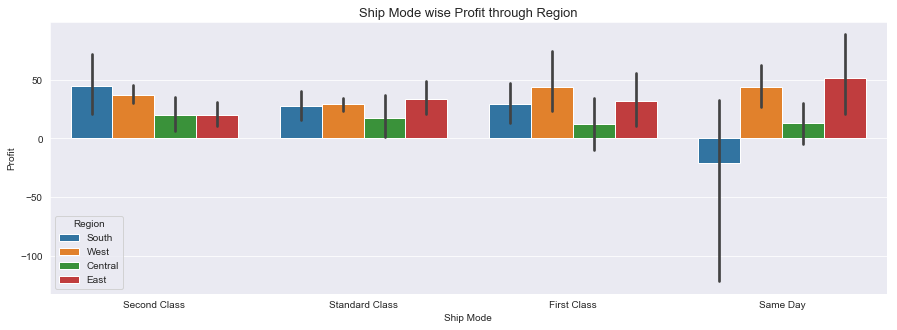

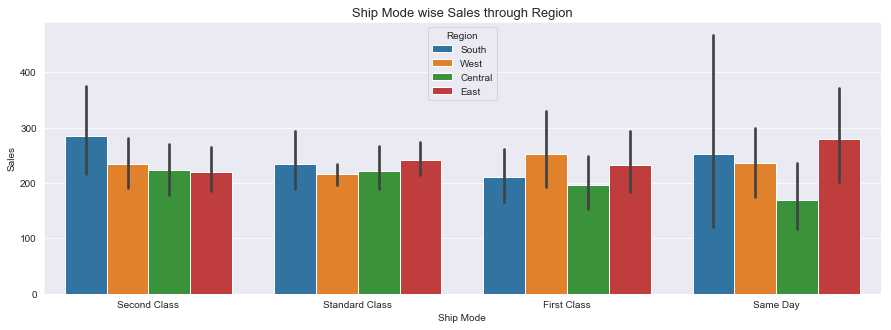

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Profit", hue="Region", data=data);plt.title('Ship Mode wise Profit through Region',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Sales", hue="Region", data=data);plt.title('Ship Mode wise Sales through Region',fontsize = 13)
plt.show()

#### Profit are lowest on same day shiiping mode in South region.

#### sales are almost same for any shipping mode in every region.

C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


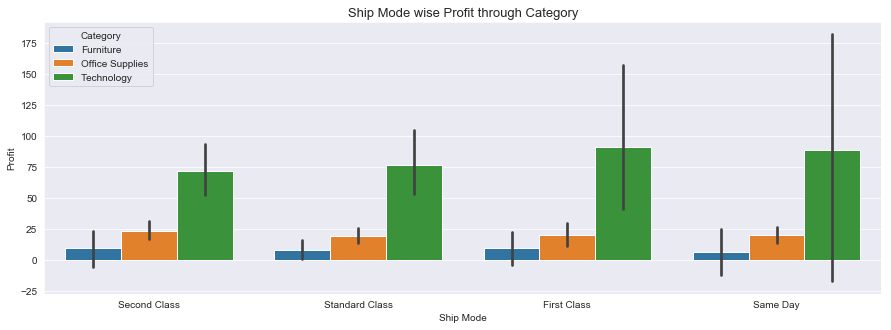

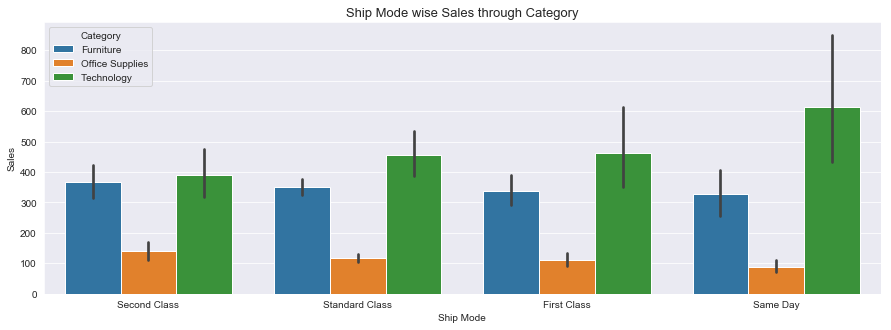

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Profit", hue="Category", data=data);plt.title('Ship Mode wise Profit through Category',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Sales", hue="Category", data=data);plt.title('Ship Mode wise Sales through Category',fontsize = 13)
plt.show()

#### profit by Furniture is lowest in every shipping mode.

#### Sales by Office Supplies is lowest in every shipping mode.

C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


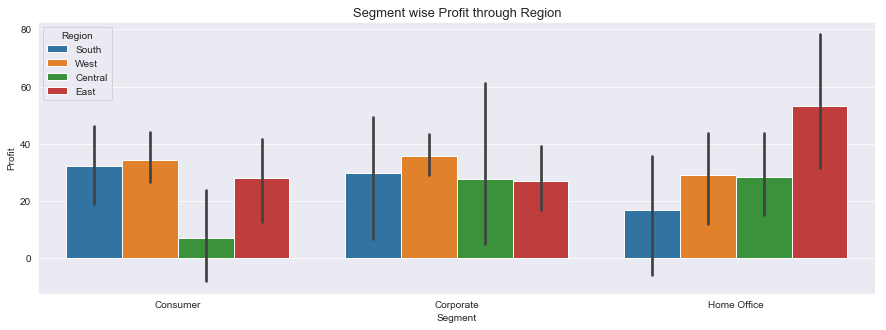

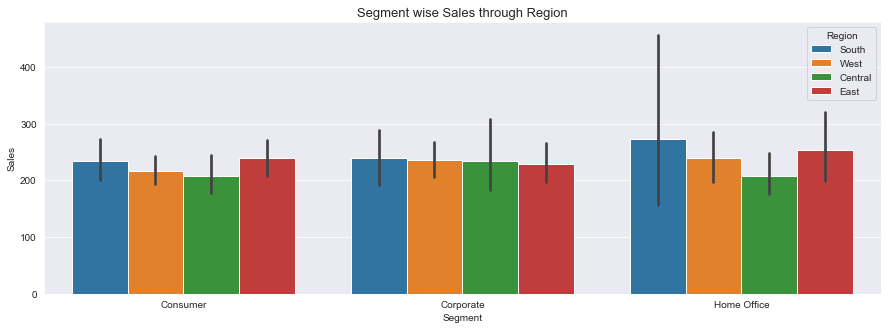

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Profit", hue="Region", data=data);plt.title('Segment wise Profit through Region',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Sales", hue="Region", data=data);plt.title('Segment wise Sales through Region',fontsize = 13)
plt.show()

#### Profit are lowest in Central region through consumer segment.

#### sales are almost same for any shipping mode in every segment.

C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


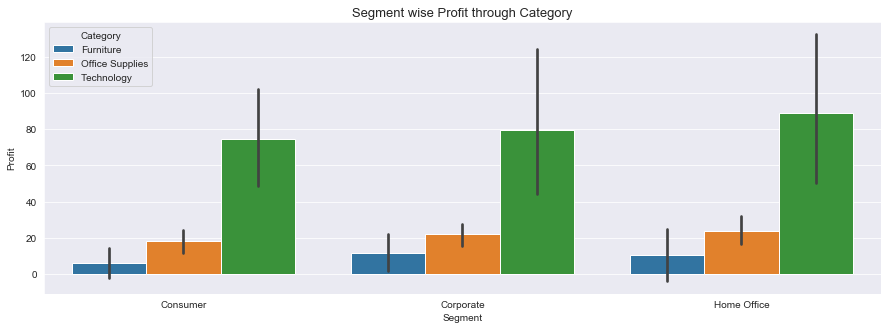

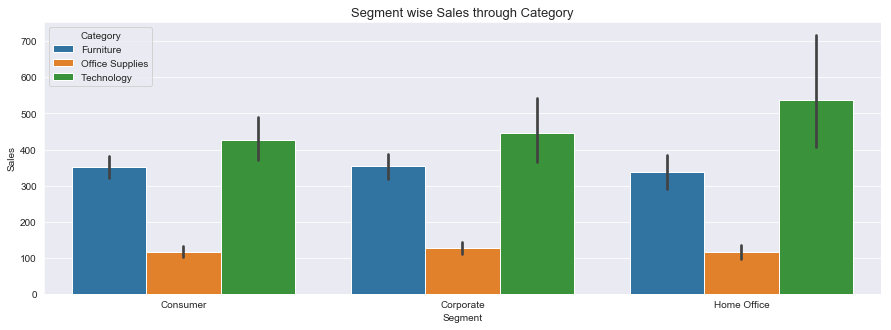

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Profit", hue="Category", data=data);plt.title('Segment wise Profit through Category',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Sales", hue="Category", data=data);plt.title('Segment wise Sales through Category',fontsize = 13)
plt.show()

#### profit by Furniture is lowest in every segment.

#### Sales by Office Supplies is lowest in every segment.

C:\Users\RAHUL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


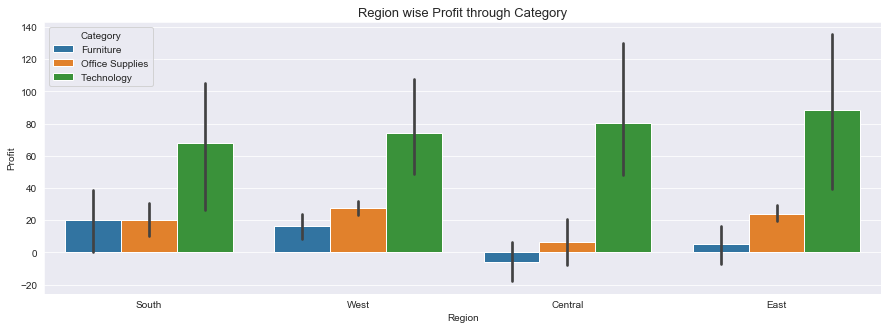

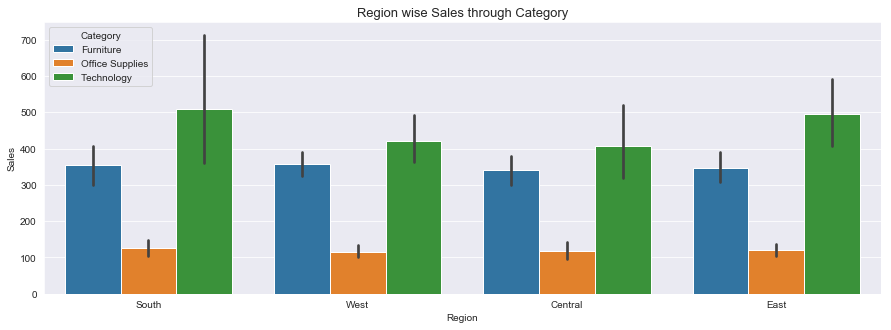

In [ ]:
plt.figure(figsize=(15,5));
sns.barplot(x="Region", y="Profit", hue="Category", data=data);plt.title('Region wise Profit through Category',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Region", y="Sales", hue="Category", data=data);plt.title('Region wise Sales through Category',fontsize = 13)
plt.show()

#### profit by Furniture is lowest in every Category.

#### Sales by Office Supplies is lowest in every Category.

### Checking for Outliers

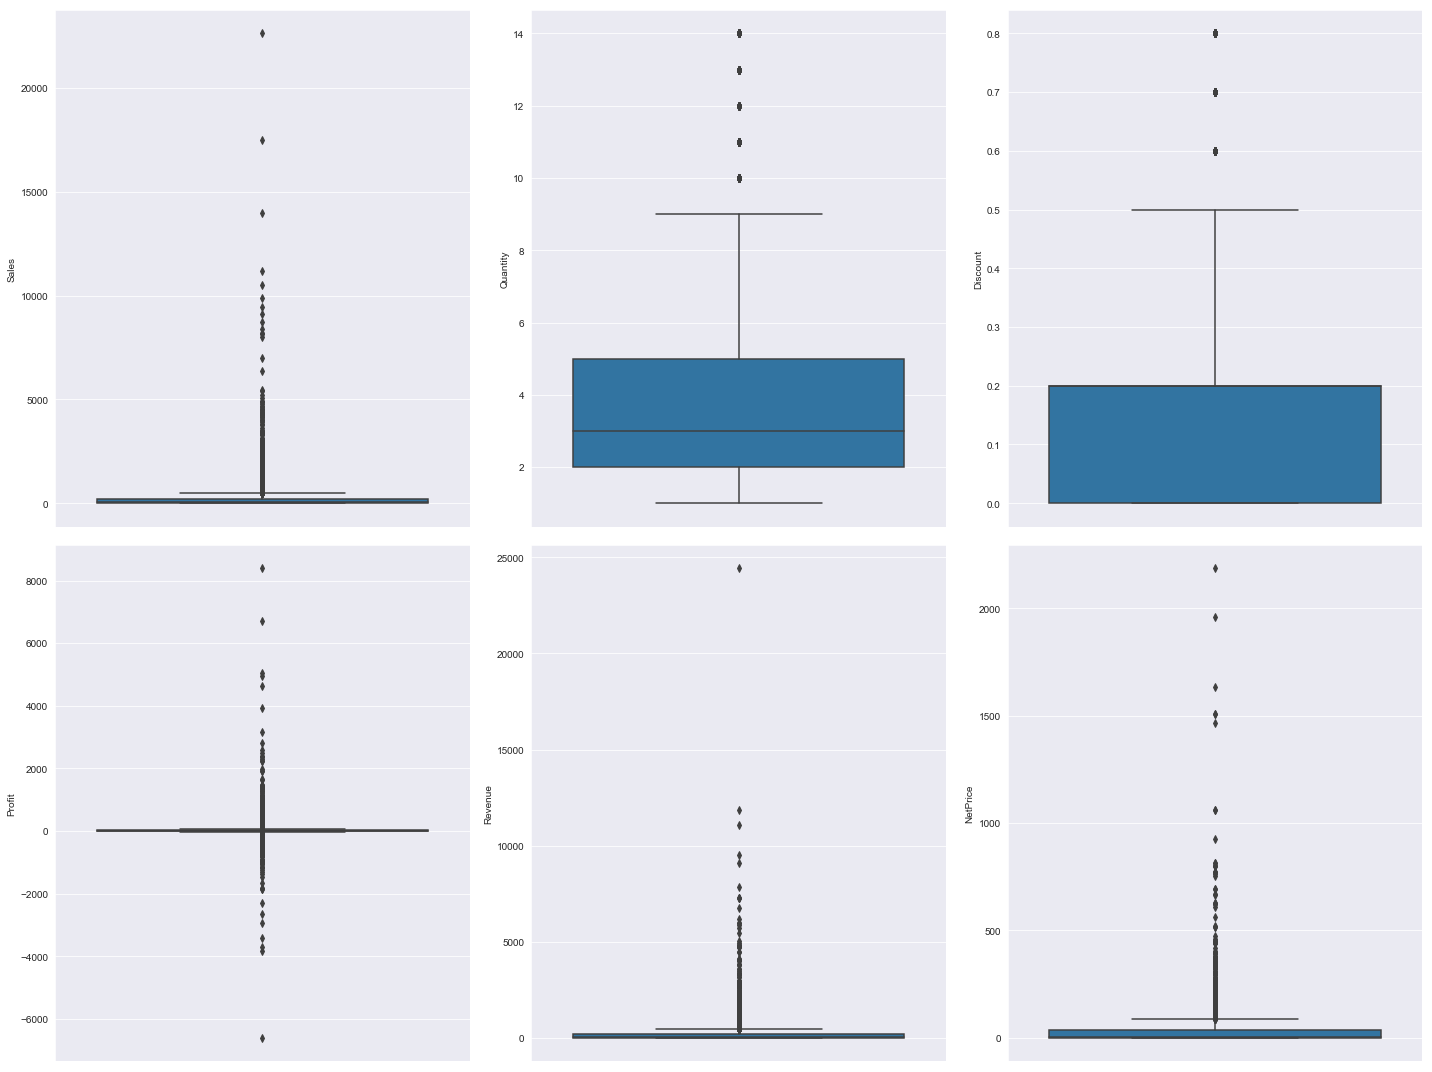

In [ ]:
#To detect the outlier in the data using the boxplot diagram
l=df_Continuous.columns
n=len(l)
number_of_figures_columnwise=3
number_of_figures_rowwise = (n-1)/number_of_figures_columnwise
plt.figure(figsize=(20,15))
for i in range(0,n):
    plt.subplot(number_of_figures_rowwise + 1,number_of_figures_columnwise,i+1)
    sns.set_style('darkgrid')
    sns.boxplot(data[l[i]],orient='v')
    plt.tight_layout()

### Heatmap

Text(0.5,1,'Correlation matrix')

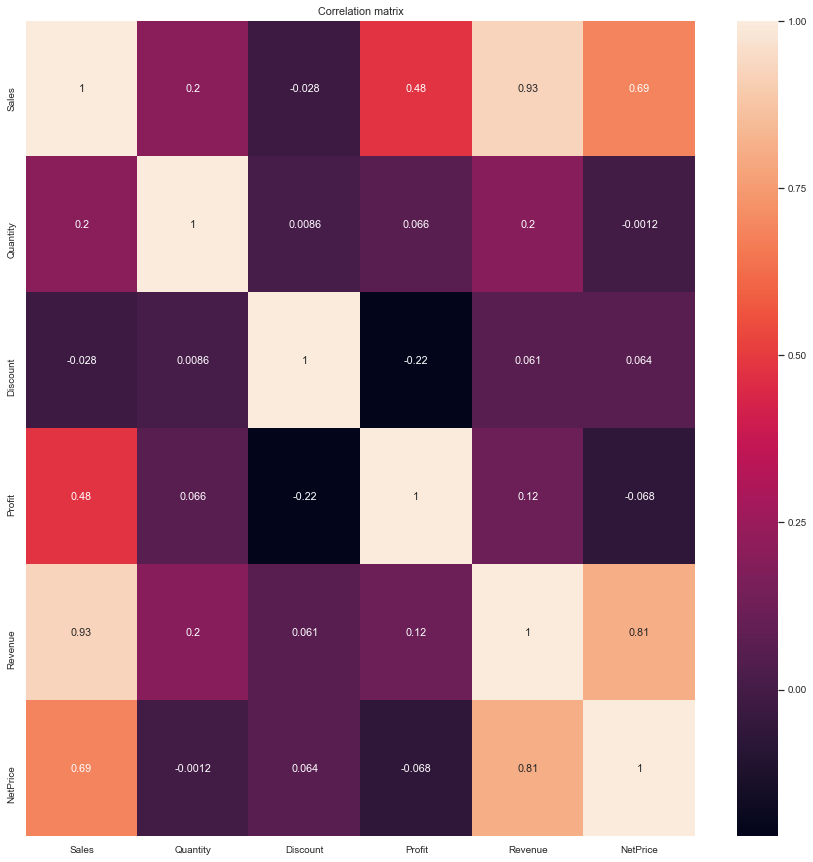

In [ ]:
plt.figure(figsize=(15,15))
sns.set(style='whitegrid', font_scale=0.9)
corrs = data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs,annot=True)
plt.title('Correlation matrix')

#### We can see there is negative correaltion between Discount & Profit so we can say that, as discount increases Companny's profits are decreases

### Grouping columns to get insights

In [ ]:
data[['Sales','Profit', 'Discount']].groupby(['Sales'], as_index=False).mean().sort_values(by='Discount', ascending=False)

,Sales,Profit,Discount
42,1.788,-3.0396,0.8
0,0.444,-1.1100,0.8
179,3.540,-5.4870,0.8
3958,210.392,-336.6272,0.8
188,3.656,-5.8496,0.8
3796,182.994,-320.2395,0.8
1264,20.388,-53.0088,0.8
1314,21.380,-33.1390,0.8
1316,21.392,-54.5496,0.8
3763,177.980,-453.8490,0.8


### Pivot tables to get insights

In [ ]:
data.pivot_table(index=["Ship Mode"], values=["Sales","Profit","Discount","Quantity"], aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Ship Mode,,,,
First Class,253.17,48969.8399,5693.0,3.514284e+05
Same Day,82.75,15891.7589,1960.0,1.283631e+05
Second Class,270.15,57446.6354,7423.0,4.591936e+05
Standard Class,955.02,164088.7875,22797.0,1.358216e+06


### Lowest sales & profits are from same day ship mode.

In [ ]:
data.pivot_table(index=["Segment"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Segment,,,,
Consumer,820.91,134119.2092,19521.0,1.161401e+06
Corporate,477.85,91979.1340,11608.0,7.061464e+05
Home Office,262.33,60298.6785,6744.0,4.296531e+05


### Lowest sales are from consumer segment & lowest profits are from Home office segment

In [ ]:
data.pivot_table(index=["Category"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Category,,,,
Furniture,368.89,18451.2728,8028.0,741999.7953
Office Supplies,947.80,122490.8008,22906.0,719047.0320
Technology,244.40,145454.9481,6939.0,836154.0330


#### Lowest sales are from office supplies category & lowest profits are from furniture category.

In [ ]:
data.pivot_table(index=["Sub-Category"],values=["Sales","Profit","Discount","Quantity"], aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Sub-Category,,,,
Accessories,60.80,41936.6357,2976.0,167380.3180
Appliances,77.60,18138.0054,1729.0,107532.1610
Art,59.60,6527.7870,3000.0,27118.7920
Binders,567.00,30221.7633,5974.0,203412.7330
Bookcases,48.14,-3472.5560,868.0,114879.9963
Chairs,105.00,26590.1663,2356.0,328449.1030
Copiers,11.00,55617.8249,234.0,149528.0300
Envelopes,20.40,6964.1767,906.0,16476.4020
Fasteners,17.80,949.5182,914.0,3024.2800


#### Lowest sales are from fasteners sub-category & lowest profits are from tables sub-category.

In [ ]:
data.pivot_table(index=["Region"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Region,,,,
Central,558.34,39706.3625,8780.0,501239.8908
East,414.00,91522.7800,10618.0,678781.2400
South,238.55,46749.4303,6209.0,391721.9050
West,350.20,108418.4489,12266.0,725457.8245


#### Lowest sales are from South Region & lowest profits are from central region.

In [ ]:
pivot=data.pivot_table(index=["State"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)
x=pivot.sort_values('Sales', ascending=True)
x.head(10)

,Discount,Profit,Quantity,Sales
State,,,,
North Dakota,0.0,230.1497,30.0,919.910
West Virginia,0.3,185.9216,18.0,1209.824
Maine,0.0,454.4862,35.0,1270.530
South Dakota,0.0,394.8283,42.0,1315.560
Wyoming,0.2,100.1960,4.0,1603.136
District of Columbia,0.0,1059.5893,40.0,2865.020
Kansas,0.0,836.4435,74.0,2914.310
Idaho,1.8,826.7231,64.0,4382.486
Iowa,0.0,1183.8119,112.0,4579.760


#### Top 10 States of Lowest sales of the company are North Dakota, West virginia, Maine, South Dakota, Wyoming, District of Columbia, Kansas, Idaho, Iowa, New mexico.

In [ ]:
pivot=data.pivot_table(index=["State"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)
y=pivot.sort_values('Profit', ascending=True)
y.head(10)

,Discount,Profit,Quantity,Sales
State,,,,
Texas,364.64,-25729.3563,3724.0,170188.0458
Ohio,152.40,-16971.3766,1759.0,78258.1360
Pennsylvania,192.90,-15559.9603,2153.0,116511.9140
Illinois,191.90,-12607.8870,1845.0,80166.1010
North Carolina,70.60,-7490.9122,983.0,55603.1640
Colorado,57.60,-6527.8579,693.0,32108.1180
Tennessee,53.30,-5341.6936,681.0,30661.8730
Arizona,68.00,-3427.9246,862.0,35282.0010
Florida,114.65,-3399.3017,1379.0,89473.7080


#### Top 10 States of lowest Profits of the company are Texas, Ohio, Pennsylvania, lllinois, North Carolina, Colorado, Tennessee, Arizona, Florida, Oregon.

## Insights
### (1) Overall Sales of the company is 22,97,201 dollors. Overall Profits of the company is 2,86,397 dollors.

### (2)Profit are lowest & Sales are highest on same day shipping mode for corporate segment.

#### Profit are lowest on same day shiiping mode in South region.

#### Profit are lowest in Central region through consumer segment.

#### profit by Furniture is lowest in every shipping mode, Segment, Category.

#### Sales by Office Supplies is lowest in every shipping mode, Segment, Category.

#### sales are almost same for any shipping mode with segment.

### (3)There is negative correaltion between Discount & Profit so we can say that, as discount increases Companny's profits are decreases

### (4)There is negative correaltion between Discount & Profit so we can say that, as discount increases Companny's profits are decreases

### (5)Top 10 States of Lowest sales of the company are North Dakota, West virginia, Maine, South Dakota, Wyoming, District of Columbia, Kansas, Idaho, Iowa, New mexico.

#### Top 10 States of lowest Profits of the company are Texas, Ohio, Pennsylvania, lllinois, North Carolina, Colorado, Tennessee, Arizona, Florida, Oregon.